# Birthday paradox

**Problem 1a.** During exercise session, we showed that for $d$ equally likely dates in a year and $n$ people, the probability of a repeat date is $p(n)=1-\frac{d^\underline{n}}{d^n}$. We also derived a simple approximate formula for this probability: $p_a(n) = 1-e^{-\frac{n(n-1)}{2d}}$. In particular, this approximation implies that for $d=365$ dates, $p(n)$ is close to $\frac{1}{2}$ for $n=23$.

Verify how good the approximation is. To this end, write a program that computes the exact value of $p(n)$ as well as the value of the approximation $p_a(n)$ for $d=365$ and $n=1,\ldots,60$. Plot the graphs of the two functions.

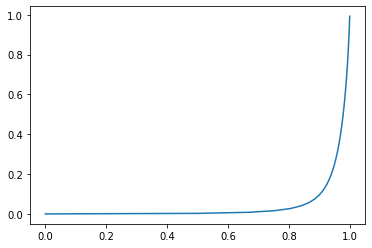

In [22]:
import math
import matplotlib.pyplot as plt
import random

x = list()
y = list()


def fun(d, n):
    res = 1/n
    for i in range(n):
        res *= d - i
    res /= d ** n
    return 1 - res


def pa(d, n):
    exp = (-1) * n * (n - 1) / (2 * d)
    return 1 - math.e ** exp


for i in range(60):
    x.append(p(365, i + 1))
    y.append(pa(365, i + 1))
    
plt.plot(x, y, label="p")
plt.show()

**Problem 1b.**
Implement a function, that chooses random dates out of $1,\ldots,d$ until a repeat occurs. The function should return the number of the step in which that happened. Run the function $N=100\,000$ times. 
    * Plot a histogram of the return values.
    * Which return value seems most likely? 
    * What is the average of the return values?
    * Is there any simple relation between these two numbers and the value $23$ in the previous problem?
    * Is there any simple relation between the histogram obtained, and the plot in the previous problem?

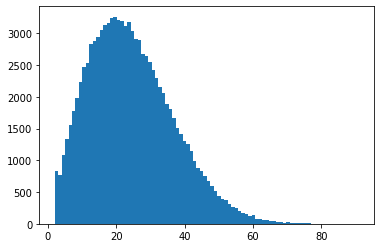

In [3]:
import matplotlib.pyplot as plt
import random

N = 100000
l = list()


def fun(d):
    s = set()
    i = 1
    while True:
        x = random.randint(1, d)
        if x in s:
            break
        s.add(x)
        i += 1
    return i


for i in range(N):
    l.append(fun(365))
    
plt.hist(l, bins=88)
plt.show()

**Problem 1c.** Here we investigate how our analysis using the classical approach compares to a more empirical one. The file *us_births_69_88.csv* contains the counts for birthdates from 1969 to 1988. Only those births, for which the full date is known, are included in the file.
    * Read the file.
    * Investigate the data. Do you notice anything strange?
    * Plot a heatmap of the data. Do you notice any significant deviations from the uniform assumption? Can you explain them?
    * Implement a sampling function as in 1b, but this time using the supplied data. Compare the results.

/tmp/ipykernel_2162/1291638892.py:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(days, months, births)


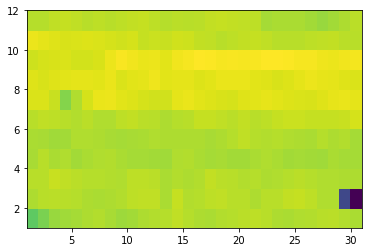

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

stats = np.loadtxt("us_births_69_88.csv", skiprows=1, delimiter=',', dtype=int)

days = []
months = []
births = []

for i in range(31):
    days.append(i + 1)
    
for i in range(12):
    months.append(i + 1)
    
for i in range(12):
    X = []
    for j in range(31):
        X.append(stats[i * 31 + j][2])
    births.append(X)

plt.pcolor(days, months, births)
plt.show()